In [1]:
from scipy import *
import numpy as np
import WLanalysis
from matplotlib import pyplot

In [2]:
idir1=('Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/1024b512/output_eb_5000_s4/')
idir2=('Om0.32750_As2.10395_mva0.04652_mvb0.04731_mvc0.06857_h0.70000_Ode0.66889/1024b512/output_eb_5000_s4/')

In [3]:
psi1z05=load(idir1+'ALL_igalXigal_0.5_0.5.npy')
psi2z05=load(idir2+'ALL_igalXigal_0.5_0.5.npy')

ps1z05=load(idir1+'ALL_galXgal_0.5_0.5.npy')
ps2z05=load(idir2+'ALL_galXgal_0.5_0.5.npy')

TEST-1 check how "wrong" is noisy derivatives: pass at std~20%


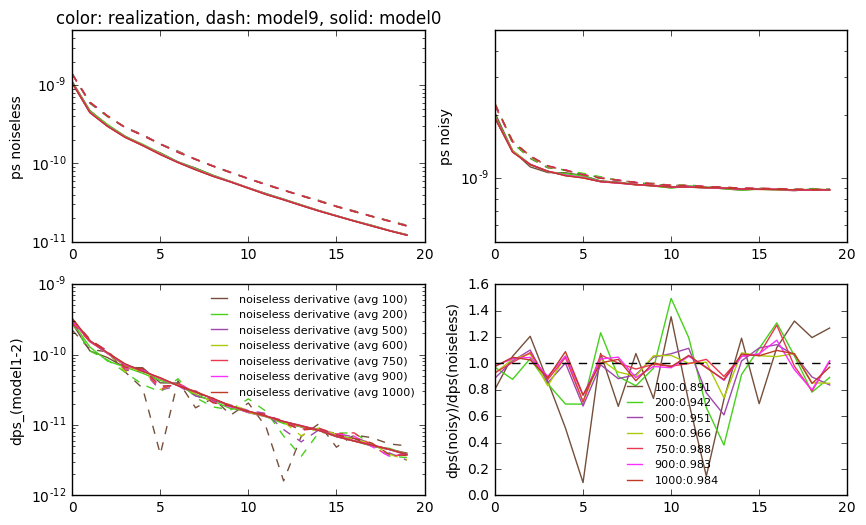

In [4]:
############  
print 'TEST-1 check how "wrong" is noisy derivatives: pass at std~20%'

seed(35)
f, ((ax1, ax2), (ax3, ax4)) = subplots(2,2, figsize=(10,6))

# for i in range(9,11):#100,16):
#     icolor=rand(3)
#     ax1.plot(psi1z05[i],'-',color=icolor)
#     ax1.plot(psi2z05[i],'--',color=icolor)
#     ax2.plot(ps1z05[i],'-',color=icolor)
#     ax2.plot(ps2z05[i],'--',color=icolor)
#     ax3.plot(psi2z05[i]-psi1z05[i],'-',color=icolor,label='noiseless derivative (r=%i)'%(i))
#     ax3.plot(ps2z05[i]-ps1z05[i],'--',color=icolor,label='noisy derivative (r=%i)'%(i))
mean_arr = []
r_arr = array([100,200,500,600,750,900,1000])
for r in r_arr:
    icolor=rand(3)
    psmean1i = mean(psi1z05[:r],axis=0)
    psmean2i = mean(psi2z05[:r],axis=0)
    psmean1 = mean(ps1z05[:r],axis=0)
    psmean2 = mean(ps2z05[:r],axis=0)

    ax1.plot(psmean1i,'-',color=icolor)
    ax1.plot(psmean2i,'--',color=icolor)
    ax2.plot(psmean1,'-',color=icolor)
    ax2.plot(psmean2,'--',color=icolor)
    ax3.plot(psmean2i-psmean1i,'-',label='noiseless derivative (avg %i)'%(r),color=icolor)
    ax3.plot(psmean2-psmean1,'--',color=icolor)#label='noisy derivative (avg %i)'%(r),
    imean = mean((psmean2-psmean1)/(psmean2i-psmean1i))
    mean_arr.append(imean)
    ax4.plot((psmean2-psmean1)/(psmean2i-psmean1i),color=icolor,label='%i:%.3f'%(r, imean))

ax4.plot(ones(20),'k--')
#ax4.set_ylim(0.8, 1.2)
ax1.set_ylabel('ps noiseless')
ax2.set_ylabel('ps noisy')
ax3.set_ylabel('dps_(model1-2)')
ax4.set_ylabel('dps(noisy)/dps(noiseless)')
ax1.set_ylim(1e-11,5e-9)
ax2.set_ylim(5e-10,5e-9)
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.set_title('color: realization, dash: model9, solid: model0')
ax3.legend(loc=0, fontsize=8,frameon=0)
ax4.legend(loc=0, fontsize=8,frameon=0)
show()

In [5]:
psIMat_cov = load('box5/output_eb_5000_s4/ALL_igalXigal_0.5_0.5.npy')[1000:]
psNMat_cov = load('box5/output_eb_5000_s4/ALL_galXgal_0.5_0.5.npy')[1000:]

print psIMat_cov.shape, psNMat_cov.shape

covI = mat(cov(psIMat_cov,rowvar=0)* (12.25/2e4)).I 
covN = mat(cov(psNMat_cov,rowvar=0)* (12.25/2e4)).I 

(9000, 20) (9000, 20)


In [6]:
print 'r, chisqI, chisqN, chisqNI, Fi, Fn, Fin'
for r in r_arr:
    icolor=rand(3)
    psmean1i = mean(psi1z05[:r],axis=0)
    psmean2i = mean(psi2z05[:r],axis=0)
    psmean1 = mean(ps1z05[:r],axis=0)
    psmean2 = mean(ps2z05[:r],axis=0)
    di, dn = psmean2i-psmean1i, psmean2-psmean1
    chisqi = float(mat(di)*covI*mat(di).T)
    iFi = float( trace(mat(di).T*mat(di)*covI))
    chisqn = float(mat(dn)*covN*mat(dn).T)
    iFn = float( trace(mat(dn).T*mat(dn)*covN))
    chisqin = float(mat(di)*covN*mat(di).T)
    iFin = float( trace(mat(di).T*mat(di)*covN))
    #iF = 
    print 'r=%i,  %.3f  %.3f  %.3f // %.3f  %.3f  %.3f'%(r,chisqi,chisqn,chisqin,1/sqrt(iFi), 1/sqrt(iFn), 1/sqrt(iFin))

print '\nTEST-2 check how if chisq converges: pass at ~5%'

r, chisqI, chisqN, chisqNI, Fi, Fn, Fin
r=100,  5328.106  659.405  770.810 // 0.014  0.039  0.036
r=200,  4800.254  672.397  739.740 // 0.014  0.039  0.037
r=500,  4344.856  809.915  880.324 // 0.015  0.035  0.034
r=600,  4395.797  831.190  876.846 // 0.015  0.035  0.034
r=750,  4480.248  857.026  885.000 // 0.015  0.034  0.034
r=900,  4390.174  872.013  895.608 // 0.015  0.034  0.033
r=1000,  4345.677  887.527  917.729 // 0.015  0.034  0.033

TEST-2 check how if chisq converges: pass at ~5%


In [7]:
ps_first = load('stats_avg/output_eb_5000_s4_first_ALL_galXgal_0.5_0.5.npy')
ps_secon = load('stats_avg/output_eb_5000_s4_secon_ALL_galXgal_0.5_0.5.npy')
ps_all = load('stats_avg/output_eb_5000_s4_ALL_galXgal_0.5_0.5.npy')
ps_alli = load('stats_avg/output_eb_5000_s4_ALL_igalXigal_0.5_0.5.npy')
print ps_first.shape, ps_secon.shape, ps_all.shape, ps_alli.shape

(101, 20) (101, 20) (101, 20) (101, 20)


In [8]:
fn_list = genfromtxt('cosmo_params_all.txt',usecols=1, dtype='string')
#list(fn_list).index('Om0.32750_As2.10395_mva0.04652_mvb0.04731_mvc0.06857_h0.70000_Ode0.66889')
fn_list[[1,40]]

array([ 'Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995',
       'Om0.32750_As2.10395_mva0.04652_mvb0.04731_mvc0.06857_h0.70000_Ode0.66889'], 
      dtype='|S72')

In [9]:
print 'model, diff(noisy/noiseless), '
for i in range(10,20):
    di = ps_alli[i]-ps_alli[1]
    dn = ps_all[i]-ps_all[1]
    dn_first = ps_first[i]-ps_first[1]
    dn_secon = ps_secon[i]-ps_secon[1]
    chisqi = float(mat(di)*covI*mat(di).T)
    chisqin = float(mat(di)*covN*mat(di).T)
    
    chisqn = float(mat(dn)*covN*mat(dn).T)
    chisqn1 = float(mat(dn_first)*covN*mat(dn_first).T)
    chisqn2 = float(mat(dn_secon)*covN*mat(dn_secon).T)
    print 'cosmo=%02d dn/di=%.2f dn1/di=%.2f dn2/di=%.2f // xiI=%.3f xiIN=%.3f xiN=%.3f xiN1=%.3f xiN2=%.3f'%(i, mean(dn/di), mean(dn_first/di), mean(dn_secon/di), 
              chisqi, chisqin, chisqn, chisqn1, chisqn2)

model, diff(noisy/noiseless), 
cosmo=10 dn/di=1.02 dn1/di=1.04 dn2/di=1.00 // xiI=5814.608 xiIN=1234.581 xiN=1276.342 xiN1=1340.473 xiN2=1219.259
cosmo=11 dn/di=0.96 dn1/di=0.71 dn2/di=1.21 // xiI=404.567 xiIN=54.972 xiN=59.244 xiN1=61.921 xiN2=90.053
cosmo=12 dn/di=1.03 dn1/di=1.06 dn2/di=1.00 // xiI=2979.688 xiIN=670.854 xiN=706.780 xiN1=757.348 xiN2=663.823
cosmo=13 dn/di=1.00 dn1/di=1.05 dn2/di=0.96 // xiI=737.298 xiIN=146.014 xiN=147.759 xiN1=154.426 xiN2=141.860
cosmo=14 dn/di=0.99 dn1/di=0.94 dn2/di=1.04 // xiI=8410.621 xiIN=1894.135 xiN=1905.204 xiN1=1731.836 xiN2=2123.982
cosmo=15 dn/di=0.99 dn1/di=0.97 dn2/di=1.01 // xiI=53615.469 xiIN=12220.017 xiN=12115.525 xiN1=11505.454 xiN2=12771.207
cosmo=16 dn/di=1.04 dn1/di=1.07 dn2/di=1.02 // xiI=176.580 xiIN=40.702 xiN=44.506 xiN1=49.995 xiN2=40.756
cosmo=17 dn/di=1.02 dn1/di=1.06 dn2/di=0.98 // xiI=2891.613 xiIN=611.478 xiN=631.692 xiN1=676.209 xiN2=591.483
cosmo=18 dn/di=1.00 dn1/di=0.99 dn2/di=1.00 // xiI=114393.997 xiIN=26296.63

In [10]:
print '\nTEST-3 check if PS interpolated chisq converges\n'
params = genfromtxt('cosmo_params_all.txt',usecols=[2,3,4])
fidu_params = (0.1, 0.3, 2.1)

psinterpi = WLanalysis.buildInterpolator(ps_alli[1:], params[1:,])
psinterpn = WLanalysis.buildInterpolator(ps_all[1:], params[1:,])
psinterpn1 = WLanalysis.buildInterpolator(ps_first[1:], params[1:,])
psinterpn2 = WLanalysis.buildInterpolator(ps_secon[1:], params[1:,])

ir = 0.05

params_der = array( [[[0.1*(1.0-ir/2), 0.3, 2.1],[0.1*(1.0+ir/2), 0.3, 2.1]] ,
                        [[0.1, 0.3*(1.0-ir/2), 2.1],[0.1, 0.3*(1.0+ir/2), 2.1]] ,
                        [[0.1, 0.3, 2.1*(1.0-ir/2)],[0.1, 0.3, 2.1*(1.0+ir/2)]]] )

for i in range(3):
    for ir in (0.02, 0.04, 0.06, 0.1):    
        idi = psinterpi(params_der[i][0]) - psinterpi(fidu_params)
        idn = psinterpn(params_der[i][0]) - psinterpn(fidu_params)
        idn1 = psinterpn1(params_der[i][0]) - psinterpn1(fidu_params)
        idn2 = psinterpn2(params_der[i][0]) - psinterpn2(fidu_params)

        chisqi = float(mat(idi)*covI*mat(idi).T)
        chisqin = float(mat(idi)*covN*mat(idi).T)

        chisqn = float(mat(idn)*covN*mat(idn).T)
        chisqn1 = float(mat(idn1)*covN*mat(idn1).T)
        chisqn2 = float(mat(idn2)*covN*mat(idn2).T)
        print 'step=%s, dn/di=%.2f dn1/di=%.2f dn2/di=%.2f // xiI=%.2e xiIN=%.2e xiN=%.2e xiN1=%.2e xiN2=%.2e'%(ir/2,
        mean(idn/idi), mean(idn1/idi), mean(idn2/idi), chisqi, chisqin, chisqn, chisqn1, chisqn2)
        
print '\n Seems to be fluctuating up and down'


TEST-3 check if PS interpolated chisq converges

step=0.01, dn/di=0.86 dn1/di=0.18 dn2/di=1.54 // xiI=2.32e-01 xiIN=2.61e-02 xiN=3.07e-02 xiN1=3.89e-02 xiN2=5.64e-02
step=0.02, dn/di=0.86 dn1/di=0.18 dn2/di=1.54 // xiI=2.32e-01 xiIN=2.61e-02 xiN=3.07e-02 xiN1=3.89e-02 xiN2=5.64e-02
step=0.03, dn/di=0.86 dn1/di=0.18 dn2/di=1.54 // xiI=2.32e-01 xiIN=2.61e-02 xiN=3.07e-02 xiN1=3.89e-02 xiN2=5.64e-02
step=0.05, dn/di=0.86 dn1/di=0.18 dn2/di=1.54 // xiI=2.32e-01 xiIN=2.61e-02 xiN=3.07e-02 xiN1=3.89e-02 xiN2=5.64e-02
step=0.01, dn/di=0.99 dn1/di=0.96 dn2/di=1.03 // xiI=3.05e+02 xiIN=6.24e+01 xiN=6.34e+01 xiN1=6.21e+01 xiN2=6.54e+01
step=0.02, dn/di=0.99 dn1/di=0.96 dn2/di=1.03 // xiI=3.05e+02 xiIN=6.24e+01 xiN=6.34e+01 xiN1=6.21e+01 xiN2=6.54e+01
step=0.03, dn/di=0.99 dn1/di=0.96 dn2/di=1.03 // xiI=3.05e+02 xiIN=6.24e+01 xiN=6.34e+01 xiN1=6.21e+01 xiN2=6.54e+01
step=0.05, dn/di=0.99 dn1/di=0.96 dn2/di=1.03 // xiI=3.05e+02 xiIN=6.24e+01 xiN=6.34e+01 xiN1=6.21e+01 xiN2=6.54e+01
step=0.01, dn/

In [11]:
print '''Test-4 compare a fisher matrix (2D) for different fiducial parameter
Seems like Fisher error is biased, but chisquare is not, but why? due to noise?
'''

def Fisher2d(covI, der):
    Nparams, Nbin = der.shape
    F = zeros( shape= (Nparams, Nparams))
    for i in range(Nparams):
        for j in range(Nparams):
            dA, dB = der[i], der[j]
            Mij = mat(dA).T*mat(dB) + mat(dB).T*mat(dA)  
            F [i,j]= 0.5*trace(covI*Mij)
    Ferr = real(sqrt(mat(F).I)) [range(Nparams), range(Nparams)]
    return F, Ferr

ir = 0.05

p0, p1, p2 = 0.1, 0.3, 2.1

for p0, p1 in ((0.15, 0.3),(0.2, 0.3),(0.1, 0.25),(0.1, 0.35),(0.1, 0.3)):
    
    print '\nMnu, omega_m, As',p0, p1, p2
    
    params_der = array( [[[p0*(1.0-ir/2), p1, 2.1],[p0*(1.0+ir/2), 0.3, 2.1]] ,
                        [[p0, p1*(1.0-ir/2), 2.1],[p0, p1*(1.0+ir/2), 2.1]]])

    idi = array([ (psinterpi(params_der[i][0]) - psinterpi(fidu_params))/(fidu_params[i]*ir/2.0) for i in range(2)])
    idn = array([ (psinterpn(params_der[i][0]) - psinterpn(fidu_params))/(fidu_params[i]*ir/2.0) for i in range(2)])
    idn1 =array([ (psinterpn1(params_der[i][0]) - psinterpn1(fidu_params))/(fidu_params[i]*ir/2.0) for i in range(2)])
    idn2 =array([ (psinterpn2(params_der[i][0]) - psinterpn2(fidu_params))/(fidu_params[i]*ir/2.0) for i in range(2)])

    Flist = [Fisher2d(covI, idi),  Fisher2d(covN, idi), Fisher2d(covN, idn),Fisher2d(covN, idn1), Fisher2d(covN, idn2)]
    chilist = [mat(idi[0])*covI*mat(idi[0]).T, mat(idi[0])*covN*mat(idi[0]).T, mat(idn[0])*covN*mat(idn[0]).T,
               mat(idn1[0])*covN*mat(idn1[0]).T, mat(idn2[0])*covN*mat(idn2[0]).T]
    i=0
    for iF in Flist:        
        print 'Fisher:',iF[1], 'Chisq=%.2f'%(float(chilist[i])),['covI, derI','covN, derI','covN, derN','covN, derN1','covN, derN2'][i]
        i+=1


Test-4 compare a fisher matrix (2D) for different fiducial parameter
Seems like Fisher error is biased, but chisquare is not, but why? due to noise?


Mnu, omega_m, As 0.15 0.3 2.1
Fisher: [ 0.00218103  0.0018294 ] Chisq=6712266.38 covI, derI
Fisher: [ 0.01547041  0.0130175 ] Chisq=1377967.05 covN, derI
Fisher: [ 0.00767427  0.00642021] Chisq=1361516.55 covN, derN
Fisher: [ 0.00653637  0.00504638] Chisq=1054767.92 covN, derN1
Fisher: [ 0.00583755  0.00528733] Chisq=1762177.71 covN, derN2

Mnu, omega_m, As 0.2 0.3 2.1
Fisher: [ 0.00116231  0.00163694] Chisq=32624417.29 covI, derI
Fisher: [ 0.01328407  0.01876165] Chisq=6937277.63 covN, derI
Fisher: [ 0.00368549  0.00537169] Chisq=7756136.03 covN, derN
Fisher: [ 0.00231412  0.00362875] Chisq=8846180.09 covN, derN1
Fisher: [ 0.00333217  0.00453676] Chisq=6945460.89 covN, derN2

Mnu, omega_m, As 0.1 0.25 2.1
Fisher: [ 0.00248869  0.00671307] Chisq=1778401405.34 covI, derI
Fisher: [ 0.0081115  0.021872 ] Chisq=361360827.99 covN, derI
Fisher

In [13]:
# for ichi in chiplans:
#     imshow(exp(-0.5*ichi).T,origin='lower',aspect='auto',interpolation='nearest')
#     show()

In [14]:
X,Y = meshgrid(Mnu_arr, Om_arr)

In [15]:
from matplotlib.patches import Ellipse
def plotEllipse(pos,P,edge,ls,ilabel,ax,fill=0,alpha=1):
    '''plot the contour for covariance p
    where position is the center position
    p is the covariance [2,2] matirx'''
    U, s, Vh = svd(P) 
    orient = math.atan2(U[1,0],U[0,0])*180/pi
    ellipsePlot = Ellipse(xy=pos, width=2.0*math.sqrt(s[0]), 
                          height=2.0*math.sqrt(s[1]), angle=orient,edgecolor=edge, fill = 0, label=ilabel,ls=ls,linewidth=1.5,alpha=1)
    ax.add_patch(ellipsePlot)
    return ellipsePlot

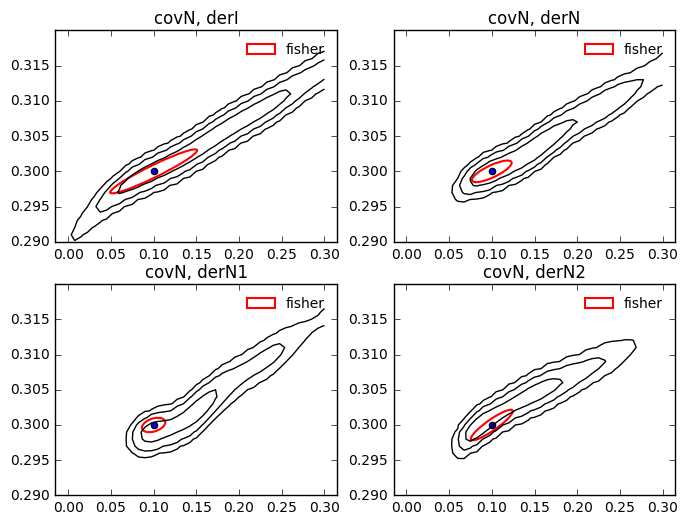

In [21]:
Na, Nb = 41,51
Mnu_arr = linspace(0.0, 0.3, Na)
Om_arr = linspace(0.28, 0.33, Nb)
#param_arr= array(meshgrid(Mnu_arr, Om_arr)).reshape(2,-1).T

chiplans = zeros((5,Na,Nb))

psi = WLanalysis.buildInterpolator(ps_alli[1:], params[1:,])
psn = WLanalysis.buildInterpolator(ps_all[1:], params[1:,])
psn1 = WLanalysis.buildInterpolator(ps_first[1:], params[1:,])
psn2 = WLanalysis.buildInterpolator(ps_secon[1:], params[1:,])

for iNa in range(Na):
    for iNb in range(Nb):
        diffi = psi((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_alli[1]
        diffn = psn((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_all[1]
        diffn1 = psn1((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_all[1]
        diffn2 = psn2((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_all[1]
        chiplans[0, iNa, iNb] = float(mat(diffi)*covI*mat(diffi).T)
        chiplans[1, iNa, iNb] = float(mat(diffi)*covN*mat(diffi).T)
        chiplans[2, iNa, iNb] = float(mat(diffn)*covN*mat(diffn).T)
        chiplans[3, iNa, iNb] = float(mat(diffn1)*covN*mat(diffn1).T)
        chiplans[4, iNa, iNb] = float(mat(diffn2)*covN*mat(diffn2).T)

        
############# plotting
labels = ['covN, derI','covN, derN','covN, derN1','covN, derN2']
seed(55)

f, ((ax1,ax2),(ax3,ax4))  = subplots(2,2,figsize=(8,6))

i=1
for ax in (ax1,ax2,ax3,ax4):
    icolor='k'  
    
    ichi = chiplans[i]
    ip = exp(-0.5*ichi).T
    iF = Flist[i][0]
    il = sort(WLanalysis.findlevel(ip))
    ax.contour(X, Y, ip,levels=il, origin='lower',aspect='auto',
               interpolation='nearest',colors=icolor,label=labels[i-1],lw=0.5)
    plotEllipse([0.1, 0.3], mat(iF).I, 'r','solid','fisher',ax)
    #ax.clabel(CS)
    ax.scatter(0.1, 0.3)
    ax.set_ylim(0.29, 0.32)
    ax.legend(fontsize=10, frameon=0, loc=0)
    ax.set_title(labels[i-1])
    i+=1
show()

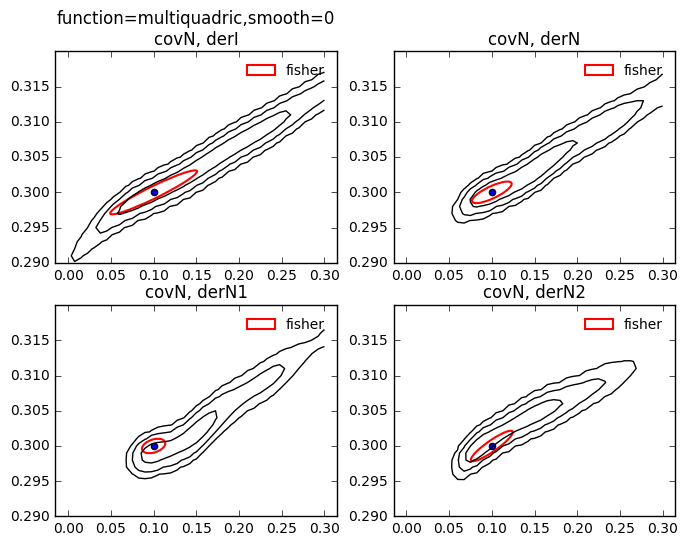

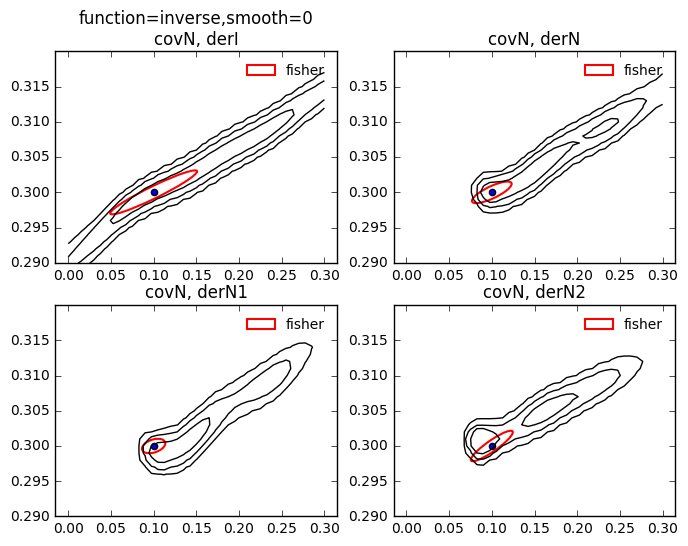

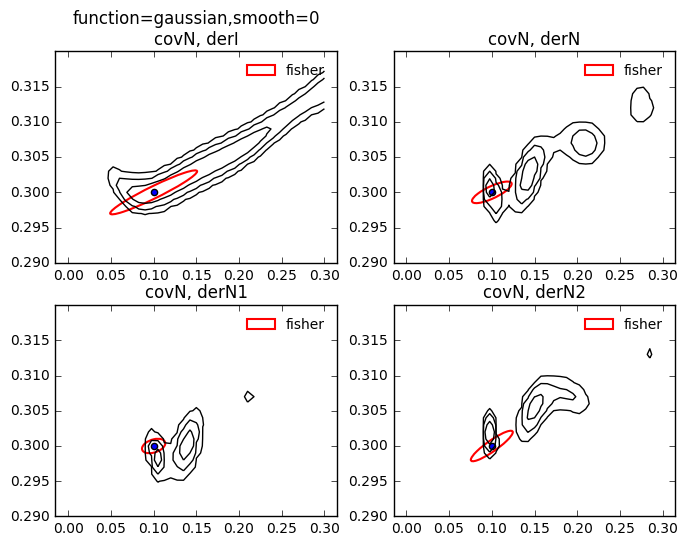

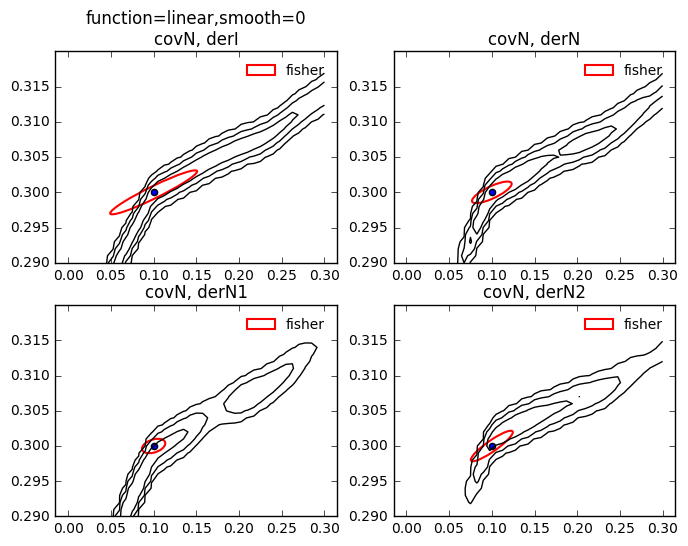

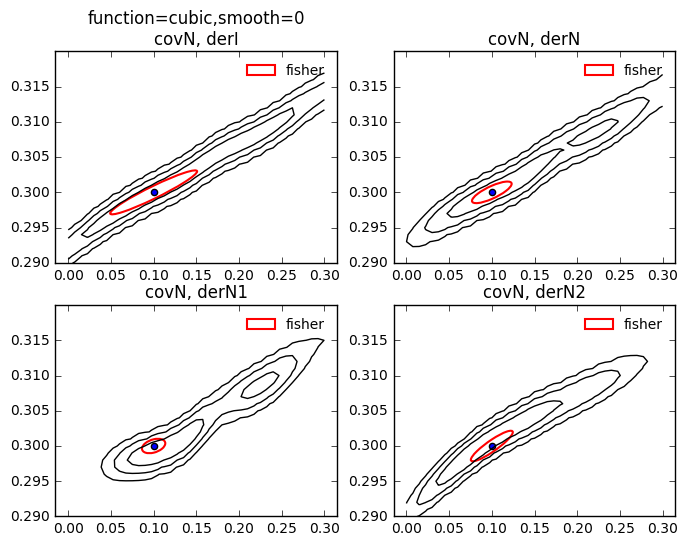

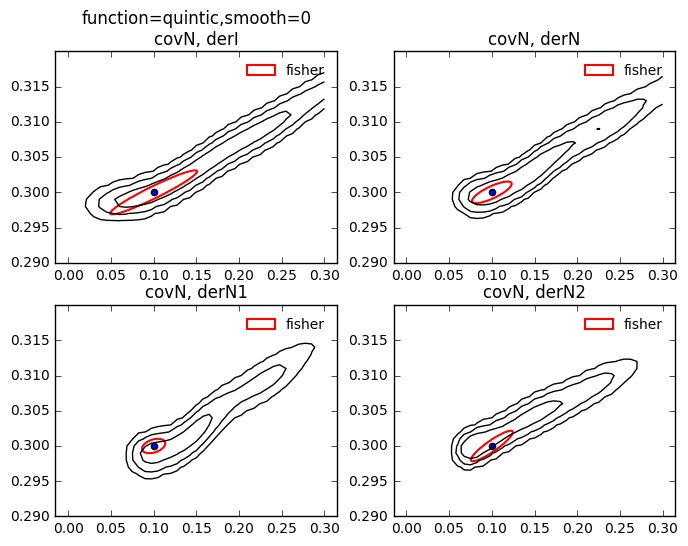

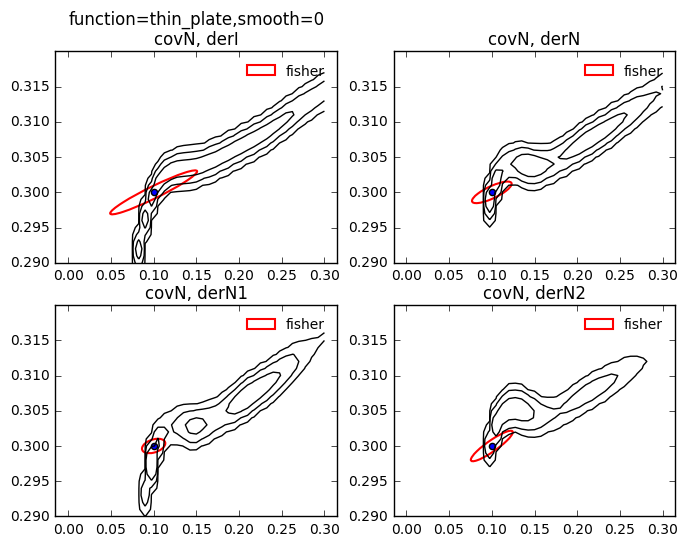

In [22]:
chiplans = zeros((5,Na,Nb))
for ifunc in ('multiquadric', 'inverse','gaussian','linear','cubic','quintic','thin_plate'):
    ismooth = 0
    
    psi = WLanalysis.buildInterpolator(ps_alli[1:], params[1:,],function=ifunc,smooth=ismooth)
    psn = WLanalysis.buildInterpolator(ps_all[1:], params[1:,],function=ifunc,smooth=ismooth)
    psn1 = WLanalysis.buildInterpolator(ps_first[1:], params[1:,],function=ifunc,smooth=ismooth)
    psn2 = WLanalysis.buildInterpolator(ps_secon[1:], params[1:,],function=ifunc,smooth=ismooth)

    for iNa in range(Na):
        for iNb in range(Nb):
            diffi = psi((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_alli[1]
            diffn = psn((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_all[1]
            diffn1 = psn1((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_all[1]
            diffn2 = psn2((Mnu_arr[iNa], Om_arr[iNb], 2.1)) - ps_all[1]
            chiplans[0, iNa, iNb] = float(mat(diffi)*covI*mat(diffi).T)
            chiplans[1, iNa, iNb] = float(mat(diffi)*covN*mat(diffi).T)
            chiplans[2, iNa, iNb] = float(mat(diffn)*covN*mat(diffn).T)
            chiplans[3, iNa, iNb] = float(mat(diffn1)*covN*mat(diffn1).T)
            chiplans[4, iNa, iNb] = float(mat(diffn2)*covN*mat(diffn2).T)


    ############# plotting
    labels = ['covN, derI','covN, derN','covN, derN1','covN, derN2']
    seed(55)

    f, ((ax1,ax2),(ax3,ax4))  = subplots(2,2,figsize=(8,6))

    i=1
    for ax in (ax1,ax2,ax3,ax4):
        icolor='k'  

        ichi = chiplans[i]
        ip = exp(-0.5*ichi).T
        iF = Flist[i][0]
        il = sort(WLanalysis.findlevel(ip))
        ax.contour(X, Y, ip,levels=il, origin='lower',aspect='auto',
                   interpolation='nearest',colors=icolor,label=labels[i-1],lw=0.5)
        plotEllipse([0.1, 0.3], mat(iF).I, 'r','solid','fisher',ax)
        #ax.clabel(CS)
        ax.scatter(0.1, 0.3)
        ax.set_ylim(0.29, 0.32)
        ax.legend(fontsize=10, frameon=0, loc=0)
        if i==1:
            ax.set_title('function=%s,smooth=%s\n%s'%(ifunc, ismooth, labels[i-1]))
        else:
            ax.set_title(labels[i-1])
        i+=1
    show()